In [1]:
import cv2
import matplotlib.pyplot as plt
from utils import print_image_metrics
from snr import ImageSNR, add_gaussian_noise
from canny import threshold, hysteresis, get_image_gradients, non_max_suppression

### GLOBALS ###
IMAGE_PATH = './shape256.jpg'
DESIRED_SNR = 6 # dB
KERNEL_SIZE = 3
SIGMA = 2
SMOOTH = True

Image Shape: (256, 256)
Image Min: 3
Image Max: 255
Unique Pixel Values: 239


Text(0.5, 1.0, 'original image')

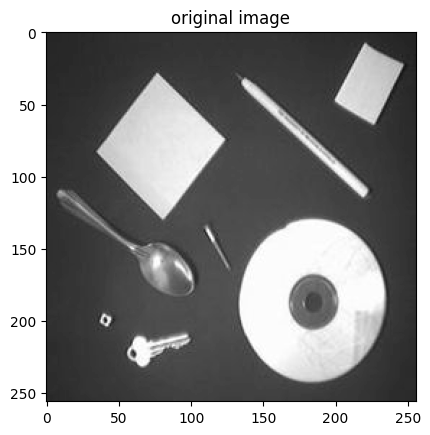

In [2]:
# Load image
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
# print some metrics
print_image_metrics(img)
# (Q1) show the image
plt.imshow(img, cmap='gray')
plt.title('original image')

The SNR equation is: Eq(SNR, 20*log(A/sigma)/log(10))
Sigma Value is: 36.0802147892416
SNR Value is: 6.00000000000001
Adding Gaussian Noise..


Text(0.5, 1.0, 'noisy image')

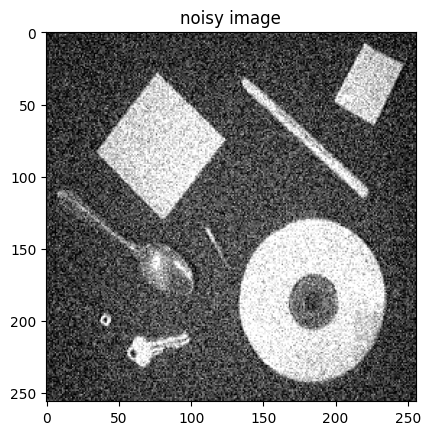

In [3]:
# (Q2) add noise to the image
image_snr = ImageSNR()
noise_sigma = image_snr.get_sigma(img, DESIRED_SNR)
print(f'Sigma Value is: {noise_sigma}')
# should be 6dB now
snr_val = image_snr.get_snr(img, noise_sigma)
print(f'SNR Value is: {snr_val}')
# create the noisy image now
print('Adding Gaussian Noise..')
noisy_image = add_gaussian_noise(img, noise_sigma)
plt.imshow(noisy_image, cmap='gray')
plt.title('noisy image')

Getting Sobel Gradients, Magnitude and Orientation..


Text(0.5, 1.0, 'Orientation')

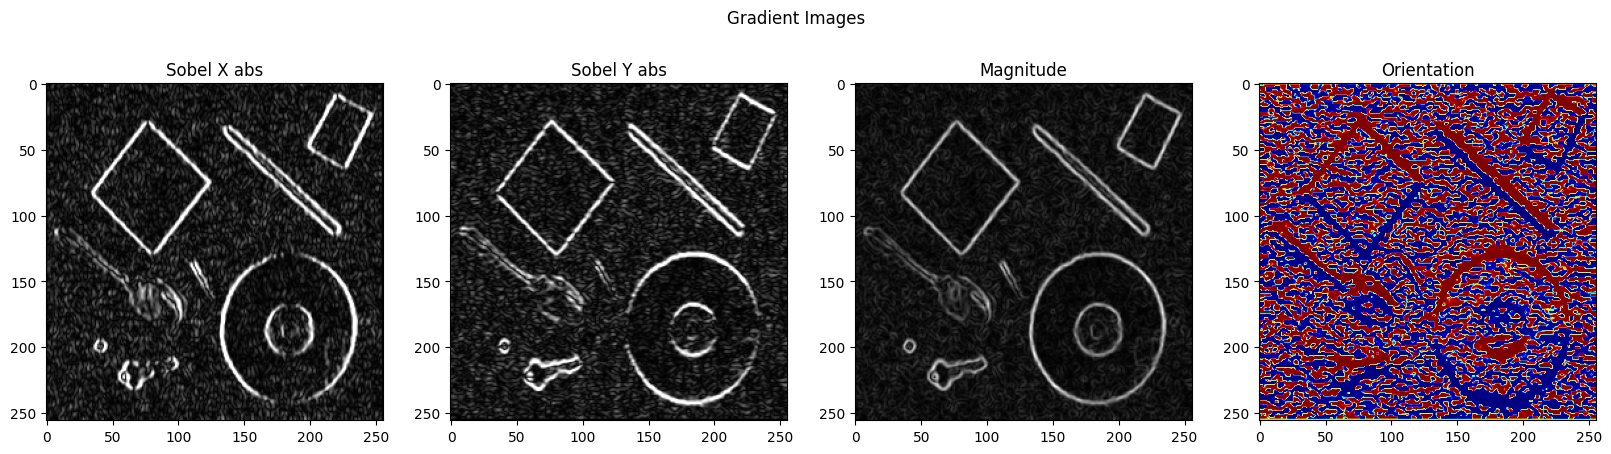

In [4]:
# (Q3) show sobel gradients
print('Getting Sobel Gradients, Magnitude and Orientation..')
sobelx_abs, sobely_abs, magnitude, orientation = get_image_gradients(noisy_image, ksize=KERNEL_SIZE, sigma=SIGMA, smooth=SMOOTH,
                                                                     abs=True)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Gradient Images')
ax1.imshow(sobelx_abs, cmap='gray')
ax1.set_title('Sobel X abs')
ax2.imshow(sobely_abs, cmap='gray')
ax2.set_title('Sobel Y abs')
ax3.imshow(magnitude, cmap='gray')
ax3.set_title('Magnitude')
ax4.imshow(orientation, cmap='jet')
ax4.set_title('Orientation')

Performing NMS..
Double Thresholding..
Hysteresis as the final step..


Text(0.5, 1.0, 'Hysteresis')

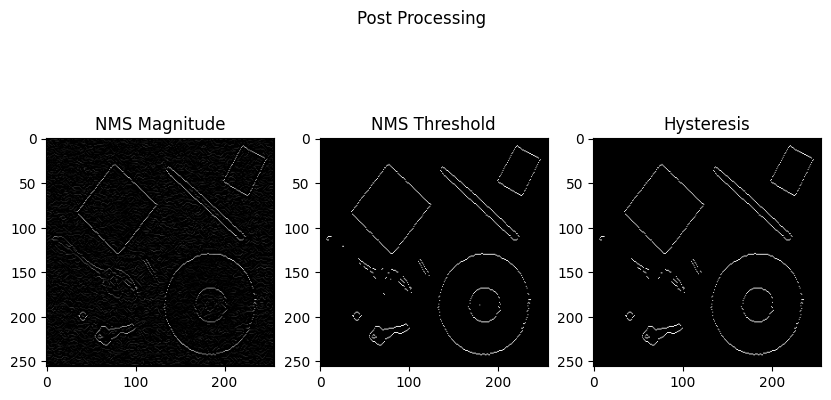

In [5]:
# (Q4) nms
print('Performing NMS..')
nms_mag = non_max_suppression(magnitude, orientation)
# finally threshold
# somewhat a little bit better
print('Double Thresholding..')
nms_th = threshold(nms_mag, 0.40, 0.90, 75, 255)
print('Hysteresis as the final step..')
nms_th = hysteresis(nms_th, 75, 255)
ret, nms_th2 = cv2.threshold(nms_mag, 200, 255, cv2.THRESH_BINARY)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Post Processing')
ax1.imshow(nms_mag, cmap='gray')
ax1.set_title('NMS Magnitude')
ax2.imshow(nms_th2, cmap='gray')
ax2.set_title('NMS Threshold')
ax3.imshow(nms_th, cmap='gray')
ax3.set_title('Hysteresis')